### Importing the dependencies

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor





### Data collection and processing

In [73]:
#loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv('car_data.csv')

currentYear =2025



In [74]:
#inspecting the first 5 rows of the dataframe
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [75]:
#checking the number of rows and columns
car_dataset.shape

(4340, 8)

In [76]:
#getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [77]:
#checking the number of missing values
car_dataset.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [78]:
#checking the distribution of categorical data

print (car_dataset.fuel.value_counts())
print(car_dataset.seller_type.value_counts())
print (car_dataset.transmission.value_counts())
print (car_dataset.owner.value_counts())


fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64
seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64
transmission
Manual       3892
Automatic     448
Name: count, dtype: int64
owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64


### Encoding the Categorical

In [79]:
# Encode các cột dạng text
# Trích xuất thương hiệu từ cột 'name'
# Chúng ta sẽ lấy từ đầu tiên trong cột 'name' làm thương hiệu
car_dataset['brand'] = car_dataset['name'].apply(lambda x: x.split(' ')[0])
car_dataset['age'] = currentYear - car_dataset['year']


#Encoding colums values
car_dataset = pd.get_dummies(car_dataset,columns=['fuel','seller_type','transmission','owner','brand'], drop_first=True)

#Logrit chuan hoa lai km driven
car_dataset['km_driven'] = np.log1p(car_dataset['km_driven'])
car_dataset['selling_price'] = np.log1p(car_dataset['selling_price'])








In [80]:
car_dataset.head()

,name,year,selling_price,km_driven,age,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,...,brand_Mercedes-Benz,brand_Mitsubishi,brand_Nissan,brand_OpelCorsa,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
0,Maruti 800 AC,2007,11.002117,11.156265,18,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
1,Maruti Wagon R LXI Minor,2007,11.813037,10.819798,18,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
2,Hyundai Verna 1.6 SX,2012,13.304687,11.512935,13,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,Datsun RediGO T Option,2017,12.429220,10.736418,8,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
4,Honda Amaze VX i-DTEC,2014,13.017005,11.856522,11,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


Splitting the data and Target


In [81]:
X =  car_dataset.drop(['name','selling_price','year'], axis=1)
Y = car_dataset['selling_price']
 

Splitting Training and Test Data

In [82]:
X_train, X_test , Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=2)

Model Training

### 1.Linear Regression


In [83]:
#loading the linear regression model
lin_reg_model = LinearRegression()

In [84]:
lin_reg_model.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Model Evaluation


In [85]:
#prediction on Training data

training_data_prediction = lin_reg_model.predict(X_train)

In [86]:
# R square errror
error_score = metrics.r2_score(Y_train,training_data_prediction)
print("R square Error(train set): " , error_score)

R square Error(train set):  0.7937131230705381


Visulize the actual price and predicted prices

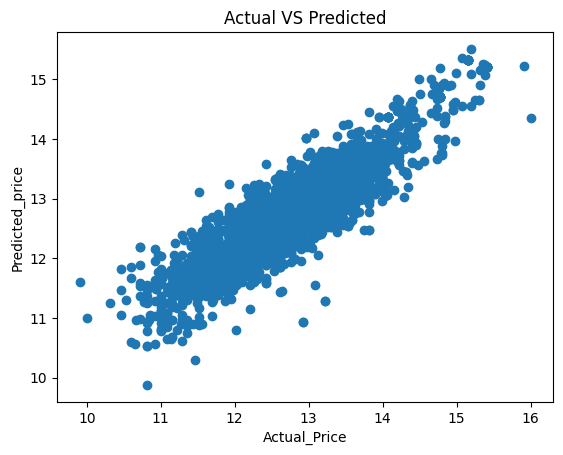

In [87]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual_Price")
plt.ylabel("Predicted_price")
plt.title("Actual VS Predicted")
plt.show()


In [88]:
#Prediction on Trainning data
test_data_prediction = lin_reg_model.predict(X_test)

In [89]:
# R square errror
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R square Error (test set): " , error_score)

R square Error (test set):  0.8035155805806581


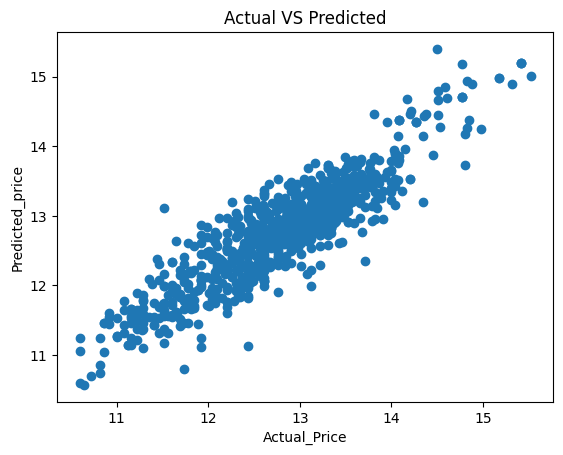

In [90]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual_Price")
plt.ylabel("Predicted_price")
plt.title("Actual VS Predicted")
plt.show()

### 2.Lasso Regression


In [91]:
#loading lasso
lass_reg =Lasso()

lass_reg.fit(X_train,Y_train)

,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [92]:
training_data_prediction = lass_reg.predict(X_train)


In [93]:
# R square errror
error_score = metrics.r2_score(Y_train,training_data_prediction)
print("R square Error(train set): " , error_score)




R square Error(train set):  0.40311367305538615


In [94]:
test_data_prediction = lass_reg.predict(X_test)
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R square Error(test set): " , error_score)


R square Error(test set):  0.4033642914114103


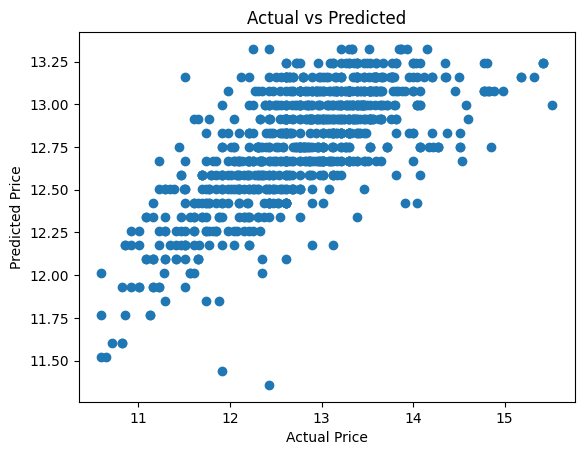

In [95]:
plt.scatter(Y_test, test_data_prediction)
plt.title('Actual vs Predicted')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

### RandomForestRegressor

In [96]:
#Practice model
rf_model =RandomForestRegressor(n_estimators=100,random_state=2)

rf_model.fit(X_train,Y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [97]:
#ktra R2_score
training_data_prediction =rf_model.predict(X_train)
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R2_score for rf_model is (training data): ", error_score)

R2_score for rf_model is (training data):  0.9586456915379843


In [98]:
test_data_prediction = rf_model.predict(X_test)
error_score=metrics.r2_score(Y_test, test_data_prediction)
print("R2_score for rf_model is(testing data): ", error_score)

R2_score for rf_model is(testing data):  0.822500615102488


### 3.XGBoost

In [99]:
#Optimize Model
XG_model = XGBRegressor(n_estimators =100, learning_rate = 0.1, max_depth =5, random_state =2 )
XG_model.fit(X_train,Y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [100]:
training_data_prediction =XG_model.predict(X_train)
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R2_score for XG_model is (training data): ", error_score)


R2_score for XG_model is (training data):  0.8551626924326378


In [101]:
test_data_prediction =XG_model.predict(X_test)
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R2_score for XG_model is (test data): ", error_score)


R2_score for XG_model is (test data):  0.8261583757833593


# Predict with new data 


### To handle new data, u have to do the same as with data-set


In [102]:

# ==============================================================================
# BƯỚC 1: TẠO DỮ LIỆU MỚI CHO MỘT CHIẾC XE
# ------------------------------------------------------------------------------
# Hãy tưởng tượng bạn muốn dự đoán giá của một chiếc Toyota Vios.
# Chúng ta sẽ tạo một DataFrame chứa thông tin của chiếc xe này.
# Lưu ý: Chúng ta không cần cột 'selling_price' vì đó là thứ chúng ta muốn dự đoán.
# Chúng ta vẫn cần 'year' để tính 'age' và 'name' để lấy 'brand'.

new_car_data = {
    'name': ['Toyota Vios 1.5G CVT'],
    'year': [2018],
    'km_driven': [40000],
    'fuel': ['Petrol'],
    'seller_type': ['Individual'],
    'transmission': ['Automatic'],
    'owner': ['First Owner']
}

new_car_df = pd.DataFrame(new_car_data) #Create a new table with only one value

print("Dữ liệu xe mới ban đầu:")
print(new_car_df)
print("-" * 50)


# ==============================================================================
# BƯỚC 2: ÁP DỤNG CÁC BƯỚC TIỀN XỬ LÝ (FEATURE ENGINEERING)
# ------------------------------------------------------------------------------
# Các bước này PHẢI GIỐNG HỆT những gì bạn đã làm với car_dataset.

# 1. Tạo cột 'age'
currentYear = 2025 # Giữ nguyên giá trị bạn đã dùng để tính tuổi cho dữ liệu huấn luyện
new_car_df['age'] = currentYear - new_car_df['year']

# 2. Áp dụng Log Transform cho 'km_driven'
new_car_df['km_driven'] = np.log(new_car_df['km_driven'])

# 3. Trích xuất 'brand' từ 'name'
new_car_df['brand'] = new_car_df['name'].apply(lambda x: x.split(' ')[0])

# 4. Áp dụng One-Hot Encoding
# Chúng ta dùng lại pd.get_dummies cho các cột tương tự
new_car_df = pd.get_dummies(new_car_df, columns=['fuel', 'seller_type', 'transmission', 'owner', 'brand'], drop_first=True)

print("Dữ liệu xe mới sau khi xử lý:")
print(new_car_df)
print("-" * 50)


# ==============================================================================
# BƯỚC 3: ĐỒNG BỘ HÓA CÁC CỘT VỚI DỮ LIỆU HUẤN LUYỆN
# ------------------------------------------------------------------------------
# Đây là bước RẤT QUAN TRỌNG.
# Sau khi One-Hot Encoding, new_car_df chỉ có các cột tương ứng với giá trị của nó
# (ví dụ: 'brand_Toyota'). Nhưng mô hình của bạn (ví dụ: lass_reg) đã được huấn luyện
# trên tập X_train với đầy đủ các cột cho tất cả các thương hiệu, loại nhiên liệu, v.v.
# Chúng ta cần đảm bảo new_car_df có chính xác các cột giống như X_train.

# Lấy danh sách các cột từ tập X đã được xử lý của bạn (X_train hoặc X_test đều được)
# Giả sử biến 'X' của bạn vẫn còn trong bộ nhớ từ các cell trước
try:
    model_columns = X.columns #Lay danh sach ten cua tca cac cot cua X (la cai bang sau khi da loai bo cac thuoc tinh thua)
except NameError:
    print("Lỗi: Biến 'X' chứa các cột huấn luyện không tồn tại. Vui lòng chạy lại các cell xử lý dữ liệu trước.")
    model_columns = []

if list(model_columns): # kiem tra xem model_columns co cac cot ko
    
    new_car_processed_df = new_car_df.reindex(columns=model_columns, fill_value=0) #reindex dam bao bang du lieu moi co day du tca cac cot theo dung khuon mau cua model_column 
    #(tu dong them cot thieu vao va dien gia tri 0) 
    #(va loai bo cac cot ko can thiet nhu name va year boi vi trong model column ko co cac cot nay)

    print("Dữ liệu cuối cùng sẵn sàng để dự đoán:")
    print(new_car_processed_df)
    print("-" * 50)

    # ==============================================================================
    # BƯỚC 4: DỰ ĐOÁN   
    # ------------------------------------------------------------------------------
    # Sử dụng mô hình Lasso đã được huấn luyện để dự đoán
    # Giả sử mô hình 'lass_reg' của bạn vẫn còn trong bộ nhớ
    try:
        predicted_price = rf_model.predict(new_car_processed_df)
        actual_predicted_price=np.expm1(predicted_price)


        print(f"Giá xe dự đoán là: { actual_predicted_price[0]:,.0f} ")
        # Sử dụng : ,.0f để định dạng số dễ đọc hơn, ví dụ: 500,000

    except NameError:
        print("Lỗi: Mô hình 'rf_model' chưa được huấn luyện. Vui lòng chạy lại các cell huấn luyện mô hình.")



Dữ liệu xe mới ban đầu:
                   name  year  km_driven    fuel seller_type transmission  \
0  Toyota Vios 1.5G CVT  2018      40000  Petrol  Individual    Automatic   

         owner  
0  First Owner  
--------------------------------------------------
Dữ liệu xe mới sau khi xử lý:
                   name  year  km_driven  age
0  Toyota Vios 1.5G CVT  2018  10.596635    7
--------------------------------------------------
Dữ liệu cuối cùng sẵn sàng để dự đoán:
   km_driven  age  fuel_Diesel  fuel_Electric  fuel_LPG  fuel_Petrol  \
0  10.596635    7            0              0         0            0   

   seller_type_Individual  seller_type_Trustmark Dealer  transmission_Manual  \
0                       0                             0                    0   

   owner_Fourth & Above Owner  ...  brand_Mercedes-Benz  brand_Mitsubishi  \
0                           0  ...                    0                 0   

   brand_Nissan  brand_OpelCorsa  brand_Renault  brand_Skoda  b

In [103]:
import joblib
import json





## Lưu mô hình tốt nhất


In [104]:
joblib.dump (rf_model, 'car_price_model.pkl')
print("Đã lưu mô hình RandomForest vào file 'car_price_model.pkl'")

Đã lưu mô hình RandomForest vào file 'car_price_model.pkl'


## --- 2. LƯU DANH SÁCH CÁC CỘT ---

In [105]:
# Giả sử DataFrame đặc trưng của bạn là X
try:
    model_columns = list (X.columns)
    # Lưu danh sách cột này vào một file JSON
    with open('model_columns.json', 'w') as f:
        json.dump(model_columns,f)
    print ("Đã lưu danh sách cột vào file model_columns.json")
except NameError:
    print("Lỗi: Biến 'X' không tồn tại. Vui lòng chạy lại cell tách X và Y trước khi chạy cell này.")


Đã lưu danh sách cột vào file model_columns.json
